In [157]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

from scipy.spatial.distance import cdist

In [158]:
DF_Players = pd.read_csv('data/players.csv')

#display all of our columns
pd.set_option("display.max_columns", None)
DF_Players.head()



,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,level,leaver_status,xp_hero,xp_creep,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,unit_order_none,unit_order_move_to_position,unit_order_move_to_target,unit_order_attack_move,unit_order_attack_target,unit_order_cast_position,unit_order_cast_target,unit_order_cast_target_tree,unit_order_cast_no_target,unit_order_cast_toggle,unit_order_hold_position,unit_order_train_ability,unit_order_drop_item,unit_order_give_item,unit_order_pickup_item,unit_order_pickup_rune,unit_order_purchase_item,unit_order_sell_item,unit_order_disassemble_item,unit_order_move_item,unit_order_cast_toggle_auto,unit_order_stop,unit_order_taunt,unit_order_buyback,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143,180,37,73,56,108,0,16,0,8840.0,5440.0,NaN,83.0,50.0,-957.0,NaN,NaN,212.0,3120.0,5145.0,1087.0,400.0,NaN,NaN,4070.0,1.0,25.0,416.0,51.0,144.0,3.0,71.0,NaN,188.0,16.0,NaN,NaN,NaN,2.0,35.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423,46,63,119,102,24,108,22,0,14331.0,8440.0,2683.0,671.0,395.0,-1137.0,NaN,NaN,1650.0,3299.0,6676.0,4317.0,937.0,NaN,NaN,5894.0,214.0,165.0,1031.0,98.0,39.0,4.0,439.0,NaN,346.0,22.0,NaN,NaN,12.0,52.0,30.0,4.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399,48,60,59,108,65,0,17,0,6692.0,8112.0,NaN,453.0,259.0,-1436.0,-1015.0,NaN,NaN,3142.0,2418.0,3697.0,400.0,NaN,NaN,7053.0,3.0,132.0,645.0,36.0,160.0,20.0,373.0,NaN,643.0,17.0,5.0,NaN,7.0,8.0,28.0,NaN,1.0,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,19,6,271,None,14832,2714,6055,63,147,154,164,79,160,21,0,8583.0,14230.0,894.0,293.0,100.0,-2156.0,NaN,NaN,938.0,4714.0,4104.0,10432.0,400.0,NaN,NaN,4712.0,133.0,163.0,690.0,9.0,15.0,7.0,406.0,NaN,150.0,21.0,NaN,NaN,1.0,9.0,45.0,7.0,NaN,14.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,17,13,245,None,33740,243,1833,114,92,147,0,137,63,24,0,15814.0,14325.0,NaN,62.0,NaN,-1437.0,-1056.0,NaN,4194.0,3217.0,7467.0,9220.0,400.0,NaN,NaN,3853.0,7.0,7.0,1173.0,31.0,84.0,8.0,198.0,NaN,111.0,23.0,1.0,NaN,NaN,2.0,44.0,6.0,NaN,13.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
#display all of our rows
pd.set_option("display.max_rows", None)
DF_Players.isnull().sum()


match_id                                  0
account_id                                0
hero_id                                   0
player_slot                               0
gold                                      0
gold_spent                                0
gold_per_min                              0
xp_per_min                                0
kills                                     0
deaths                                    0
assists                                   0
denies                                    0
last_hits                                 0
stuns                                     0
hero_damage                               0
hero_healing                              0
tower_damage                              0
item_0                                    0
item_1                                    0
item_2                                    0
item_3                                    0
item_4                                    0
item_5                          

In [160]:
DF_Heroes = pd.read_csv('data/hero_names.csv')
DF_Heroes.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [161]:
#Group onlythe data we need
player_Data = DF_Players[['account_id','hero_id','gold', 'gold_spent', 'gold_per_min', 
                          'xp_per_min', 'kills', 'deaths', 'assists', 'last_hits', 'hero_healing', 
                          'tower_damage', 'stuns', 'level', 'leaver_status', 'stuns', 'hero_damage']]

In [162]:
#Group our heroes!

#save our hero ID into a dictionary, pairing it with the heroe's name
hero = dict(zip(DF_Heroes['hero_id'],DF_Heroes['localized_name']))

#hero index 0 are not known
hero[0] = 'anonymous'

#create a new column hero in our database that has the hero ID replaced with the hero's localized_name
player_Data['hero'] = player_Data['hero_id'].apply(lambda id : hero[id])

<ipython-input-162-d28278e62a71>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_Data['hero'] = player_Data['hero_id'].apply(lambda id : hero[id])


In [163]:
#Move the hero column to the front of the dataframe by popping then inserting it 
name = 'hero'
col = player_Data.pop(name)

player_Data.insert(0, name, col)

In [164]:
player_Data.head()

,hero,account_id,hero_id,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,last_hits,hero_healing,tower_damage,stuns,level,leaver_status,stuns,hero_damage
0,Rubick,0,86,3261,10960,347,362,9,3,18,30,218,143,76.7356,16,0,76.7356,8690
1,Clockwerk,1,51,2954,17760,494,659,13,3,18,109,0,423,87.4164,22,0,87.4164,23747
2,Treant Protector,0,83,110,12195,350,385,0,4,15,58,1595,399,None,17,0,None,4217
3,Shadow Fiend,2,11,1179,22505,599,605,8,4,19,271,2714,6055,None,21,0,None,14832
4,Spectre,3,67,3307,23825,613,762,20,3,17,245,243,1833,None,24,0,None,33740


In [165]:
#group our player_Data by the mean of each hero's stats
hero_Data = player_Data.groupby(['hero']).mean()

#drop all anonymous heroes 
hero_Data.drop('anonymous',inplace=True)

In [166]:
#print out our hero Data
print(hero_Data)

                       account_id  hero_id         gold    gold_spent  \
hero                                                                    
Abaddon              38657.028399    102.0  1856.153474  11999.880665   
Alchemist            38349.547185     73.0  2769.521633  24595.311005   
Ancient Apparition   44935.407375     68.0  1662.564934  10969.666074   
Anti-Mage            40329.663367      1.0  2392.246275  19535.906769   
Axe                  38419.484677      2.0  1682.507933  13129.112150   
Bane                 43859.902859      3.0  1512.149628   9834.171563   
Batrider             41091.750474     65.0  1614.173624  12291.873814   
Beastmaster          42651.663759     38.0  1757.401269  12555.392546   
Bloodseeker          31079.849797      4.0  1821.146143  15626.151894   
Bounty Hunter        39813.543942     62.0  2004.498160  13902.702782   
Brewmaster           38878.994629     78.0  1807.365199  13749.436090   
Bristleback          36752.149268     99.0  1847.07

In [167]:
from sklearn.cluster import KMeans
#Now we are going to cluster our heroes based on their stats

#take all the values that are going to matter to our cluster
cluster = hero_Data[['gold_per_min', 'deaths', 'assists', 'kills', 'xp_per_min', 'last_hits','tower_damage']]

#Use the elbow method to find optimal numbers of clusters

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(cluster)
    kmeanModel.fit(cluster)

    distortions.append(sum(np.min(cdist(cluster, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / cluster.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(cluster, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / cluster.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\Anthony Viola\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anthony Viola\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [168]:
#map our distortion
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 796.1739385185583
2 : 414.2657723238807
3 : 278.85695603999187
4 : 192.32006265194855
5 : 169.75019547480642
6 : 147.16921923133722
7 : 134.68749965194561
8 : 120.72602635047923
9 : 111.3623127768997


In [169]:
#map our inertia
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 96153405.7857561
2 : 25688526.754226413
3 : 11438463.6273533
4 : 5961431.435560333
5 : 4218259.135950727
6 : 3062206.286743198
7 : 2506110.945215677
8 : 2002703.1194522101
9 : 1622474.8062950987


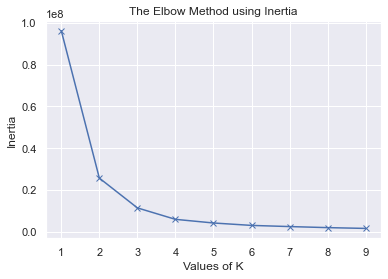

In [170]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

#from our graph, it seems that there seems to be very diminishing returns after 4 or 5 clusters. 

In [171]:
kmeans = KMeans(init="random", n_clusters=4,n_init=10,max_iter=3000, random_state=102)

#fit our cluster
kmeans.fit(cluster)

KMeans(init='random', max_iter=3000, n_clusters=4, random_state=102)

In [172]:
#generate the stats we are gonna use to label our heroes
cluster['kmeans'] = kmeans.labels_

kmeans_stats = cluster.groupby(['kmeans']).mean()

#normalize the data
kmeans_statmeans = kmeans_stats.mean(axis=0)

kmeans_range = kmeans_stats.max(axis=0) - kmeans_stats.min(axis=0)

kmeans_norm = (kmeans_stats - kmeans_statmeans) / kmeans_range



<ipython-input-172-94a8ad66a68c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['kmeans'] = kmeans.labels_


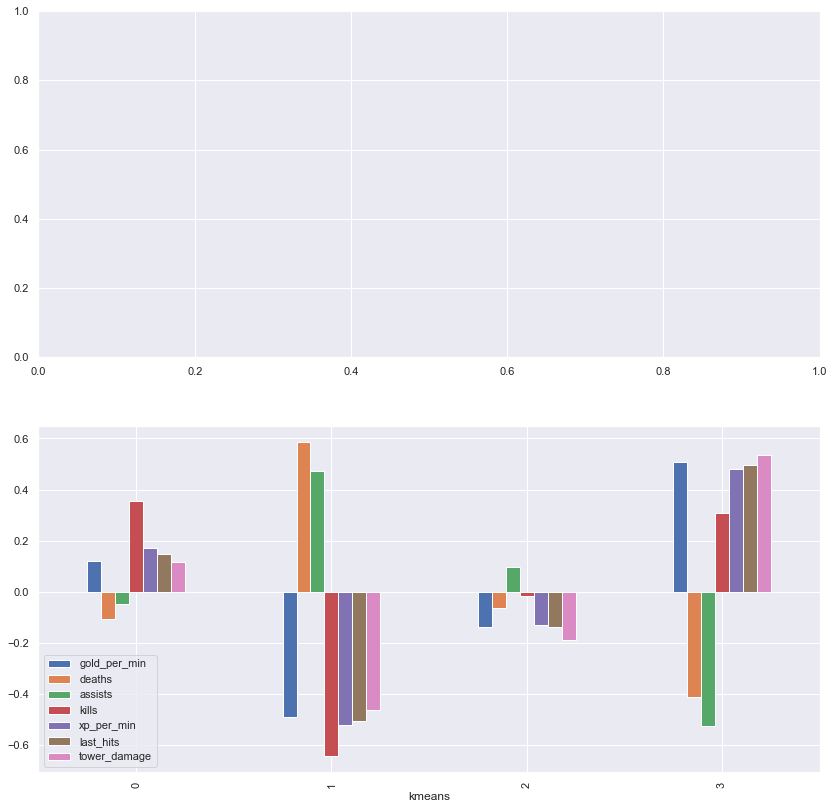

In [173]:
#Build our kmeans cluster
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(14,14))

kmeans_norm.iloc[:,:7].plot.bar(ax=axis2).legend()

In [174]:
#4 Clusters is optimal. 

#Group 0: Soft-Carry
#Group 1: Support
#Group 2: Offlaner/All-rounder
#Group 3: Hard-Carry

#label our clusters
cluster.loc[(cluster['kmeans']==0),'hero_role'] = 'Soft-carry'
cluster.loc[(cluster['kmeans']==1),'hero_role'] = 'Support'
cluster.loc[(cluster['kmeans']==2),'hero_role'] = 'Offlaner/All-rounder'
cluster.loc[(cluster['kmeans']==3),'hero_role'] = 'Hard-Carry'

C:\Users\Anthony Viola\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Anthony Viola\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Anthony Viola\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [175]:
cluster

,gold_per_min,deaths,assists,kills,xp_per_min,last_hits,tower_damage,kmeans,hero_role
hero,,,,,,,,,
Abaddon,363.055287,6.278550,12.647432,5.005740,417.260725,84.188822,1009.606949,2,Offlaner/All-rounder
Alchemist,709.545455,7.173369,11.647562,6.679019,577.001832,265.160847,2585.172758,3,Hard-Carry
Ancient Apparition,313.147046,7.492818,13.356286,4.826151,324.378054,48.930994,298.453280,1,Support
Anti-Mage,554.192742,5.449979,6.722222,7.340996,580.392827,298.673585,3081.401767,3,Hard-Carry
Axe,400.109107,9.365138,10.498153,8.525321,442.938274,136.269724,453.616605,1,Support
Bane,295.293380,7.721112,11.811986,4.766941,336.720329,32.764591,381.018801,1,Support
Batrider,362.856736,8.263757,14.039848,6.055977,418.428843,103.942125,268.393738,1,Support
Beastmaster,384.134814,7.912768,13.011895,5.455987,426.685170,111.848533,1491.495638,2,Offlaner/All-rounder
Bloodseeker,447.641746,9.190122,9.746279,9.657307,494.835927,165.670162,1449.624831,2,Offlaner/All-rounder


In [176]:
#slice Trueskill rating into Dota ranking sections and label it 

df_player_rating = pd.read_csv('data/player_ratings.csv')

#remove anonymous players
select_features = player_Data['account_id'] != 0

select_condition_3 = df_player_rating['account_id'] > 0
df_player_rating = df_player_rating[select_condition_3]
df_player_rating.tail()

,account_id,total_wins,total_matches,trueskill_mu,trueskill_sigma
834215,136022,1,2,24.065296,7.614250
834218,215153,0,1,24.004033,8.150131
834219,272061,0,1,22.214808,8.010834
834222,106173,0,1,23.069381,7.998792
834223,312076,1,1,28.217084,7.889176


In [177]:
#merge our player data to include trueskill ratings
player_Data = pd.merge(df_player_rating, player_Data, left_on='account_id', right_on='account_id')

player_Data.head()

,account_id,total_wins,total_matches,trueskill_mu,trueskill_sigma,hero,hero_id,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,last_hits,hero_healing,tower_damage,stuns,level,leaver_status,stuns,hero_damage
0,79749,21,40,30.553417,3.868734,Crystal Maiden,5,779,13435,377,502,3,6,17,56,1981,188,2.36854,19,0,2.36854,7835
1,79749,21,40,30.553417,3.868734,Shadow Demon,79,1489,13100,296,327,5,7,10,56,1815,31,47.8557,18,0,47.8557,7725
2,79749,21,40,30.553417,3.868734,Ancient Apparition,68,4508,15450,505,582,15,5,13,49,0,824,9.91907,21,0,9.91907,10794
3,79749,21,40,30.553417,3.868734,Silencer,75,512,10430,286,202,4,11,5,40,0,611,None,11,0,None,5428
4,79749,21,40,30.553417,3.868734,Enigma,33,2670,18950,490,486,2,3,25,268,4285,2732,38.6481,20,0,38.6481,10489


In [178]:
#group by account Id to get the trueskill of each individual player
skill_Data = player_Data.groupby(['account_id']).mean()
skill_Data.head()

,total_wins,total_matches,trueskill_mu,trueskill_sigma,hero_id,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,last_hits,hero_healing,tower_damage,level,leaver_status,hero_damage
account_id,,,,,,,,,,,,,,,,,,
1,14.0,24.0,26.232905,4.854238,59.0,8642.500000,21200.000000,627.500000,667.5,20.5,1.500000,13.500000,242.0,0.000000,2256.000000,23.500000,0.0,31304.500000
2,5.0,8.0,27.614505,6.550771,48.0,1756.333333,20576.666667,537.666667,520.0,10.0,7.333333,16.666667,277.0,1066.666667,3525.666667,21.333333,0.0,14060.666667
3,5.0,16.0,20.221006,5.961434,67.0,3307.000000,23825.000000,613.000000,762.0,20.0,3.000000,17.000000,245.0,243.000000,1833.000000,24.000000,0.0,33740.000000
4,11.0,20.0,26.773302,5.322094,63.5,763.500000,12597.500000,381.000000,480.0,5.5,8.500000,10.000000,146.5,0.000000,324.500000,18.500000,0.0,11819.000000
5,72.0,108.0,32.190551,2.937140,62.8,2111.400000,16593.000000,535.000000,602.2,8.4,4.600000,14.000000,181.8,0.000000,2786.000000,19.400000,0.0,17436.600000


In [179]:
#sort the data by trueskill_mu
skill_Data = skill_Data.sort_values(by=['trueskill_mu'])

skill_Data.tail()


,total_wins,total_matches,trueskill_mu,trueskill_sigma,hero_id,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,last_hits,hero_healing,tower_damage,level,leaver_status,hero_damage
account_id,,,,,,,,,,,,,,,,,,
80258,13.0,15.0,42.368793,5.497971,34.333333,3536.666667,22391.666667,614.333333,617.333333,15.666667,5.666667,16.666667,238.000000,997.666667,3455.666667,22.333333,0.0,24234.666667
55155,27.0,31.0,42.384103,4.940770,69.000000,2615.000000,12940.000000,477.000000,388.000000,6.000000,7.000000,15.000000,103.000000,779.000000,2390.000000,15.000000,0.0,12808.000000
108,24.0,28.0,42.845334,4.401254,87.384615,1919.461538,8680.000000,328.692308,364.461538,6.000000,9.000000,15.923077,37.846154,6336.615385,532.615385,15.153846,0.0,10285.461538
57008,25.0,28.0,45.434024,4.667524,37.900000,1552.700000,14352.500000,491.200000,479.200000,7.100000,6.300000,8.400000,168.400000,471.100000,2219.400000,16.500000,0.0,14574.100000
87263,22.0,22.0,46.719826,5.305605,53.500000,1175.500000,19130.000000,527.000000,526.000000,7.500000,0.500000,15.000000,181.000000,1061.000000,2154.500000,18.500000,0.0,12205.500000


In [180]:
#Let's label the mmr_Data by splitting it and grouping it 
sorted_Data = skill_Data.groupby(pd.cut(skill_Data.trueskill_mu, np.percentile(skill_Data.trueskill_mu, [0, 9, 25, 47, 70, 86, 94, 100]), include_lowest=True)).mean()

In [181]:
#Here we have our split of mmr, sorted only by skill so far (not hero)
sorted_Data['Rank'] = ['Herald','Guardian', 'Crusader', 'Archon', 'Legend', 'Ancient', 'Divine']

In [182]:
#We have succesfully grouped our players into 7 groups of each rank. 
sorted_Data

,total_wins,total_matches,trueskill_mu,trueskill_sigma,hero_id,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,last_hits,hero_healing,tower_damage,level,leaver_status,hero_damage,Rank
trueskill_mu,,,,,,,,,,,,,,,,,,,
"(7.04, 20.656]",3.918400,12.616100,18.830591,6.368722,50.806225,1908.541236,14137.876498,414.620588,448.357026,7.364752,7.680561,11.754658,131.564202,445.288709,1317.554947,18.052019,0.039544,12198.373569,Herald
"(20.656, 23.003]",5.169917,12.716630,22.006039,6.584854,50.382231,1893.149688,14107.401173,413.333724,448.264269,7.387855,7.715609,11.819976,129.368518,470.003288,1289.431732,18.070282,0.042631,12171.707940,Guardian
"(23.003, 25.25]",8.141152,17.109047,24.102706,6.349658,50.677260,1891.439419,14141.881111,414.281945,448.877538,7.350842,7.676345,11.812267,130.416193,469.012679,1314.080526,18.065887,0.040877,12168.922353,Crusader
"(25.25, 27.421]",10.533852,19.840702,26.374407,6.254547,50.968391,1899.019039,14170.933974,416.365642,449.377078,7.341466,7.630423,11.855332,130.870057,485.372498,1324.219419,18.032533,0.040559,12184.286944,Archon
"(27.421, 29.443]",12.055846,20.979926,28.337747,6.078076,51.205690,1913.333687,14205.943461,417.993790,450.550397,7.414080,7.573774,11.851882,132.157305,493.528837,1341.501837,18.038264,0.038371,12302.977675,Legend
"(29.443, 31.299]",12.888593,20.783845,30.265688,5.891808,51.036863,1927.043515,14224.676104,420.889565,451.044167,7.375438,7.436213,11.746137,133.248657,489.362033,1348.059851,17.960824,0.037168,12337.059063,Ancient
"(31.299, 46.72]",13.959665,20.332065,33.120785,5.724110,51.247316,1935.010532,14275.122438,423.947143,451.825017,7.458194,7.333239,11.765770,133.585659,513.977572,1383.673889,17.918705,0.034623,12410.958285,Divine


In [196]:
#Now it's time to group each Rank into it's own dataframe in order to group it by hero

#Create the dataframe of our herald players
Herald_Data = skill_Data[(skill_Data['trueskill_mu'] >= 7.04) & (skill_Data['trueskill_mu'] <= 20.656)]
Herald_Data['rank'] = 'Herald'

#Create the dataframe of our Guardian players
Guardian_Data = skill_Data[(skill_Data['trueskill_mu'] > 20.656) & (skill_Data['trueskill_mu'] <= 23.003)]
Guardian_Data['rank'] = 'Guardian'

#Create the dataframe of our Crusader players
Crusader_Data = skill_Data[(skill_Data['trueskill_mu'] > 23.003) & (skill_Data['trueskill_mu'] <= 25.25)]
Crusader_Data['rank'] = 'Crusader'

#Create the dataframe of our Archon players
Archon_Data = skill_Data[(skill_Data['trueskill_mu'] > 25.25) & (skill_Data['trueskill_mu'] <= 27.421)]
Archon_Data['rank'] = 'Archon'

#Create the dataframe of our Legend players
Legend_Data = skill_Data[(skill_Data['trueskill_mu'] > 27.421) & (skill_Data['trueskill_mu'] <= 29.443)]
Legend_Data['rank'] = 'Legend'

#Create the dataframe of our Ancient players
Ancient_Data = skill_Data[(skill_Data['trueskill_mu'] > 29.443) & (skill_Data['trueskill_mu'] <= 31.299)]
Ancient_Data['rank'] = 'Ancient'

#Create the dataframe of our Divine players
Divine_Data = skill_Data[(skill_Data['trueskill_mu'] > 31.299) & (skill_Data['trueskill_mu'] <= 46.72)]
Divine_Data['rank'] = 'Divine'

<ipython-input-196-775045617803>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Herald_Data['rank'] = 'Herald'
<ipython-input-196-775045617803>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Guardian_Data['rank'] = 'Guardian'
<ipython-input-196-775045617803>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [198]:
#Now that we have all these seperated, we need to take group these by hero stats just like I did above 

#Group our heroes for each rank!

#save our hero ID into a dictionary, pairing it with the heroe's name
#??? = dict(zip(DF_Heroes['hero_id'],DF_Heroes['localized_name']))

#hero index 0 are not known
#???[0] = 'anonymous'

#create a new column hero in our database that has the hero ID replaced with the hero's localized_name
#player_Data['???'] = player_Data['hero_id'].apply(lambda id : ???[id])

,total_wins,total_matches,trueskill_mu,trueskill_sigma,hero_id,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,last_hits,hero_healing,tower_damage,level,leaver_status,hero_damage,rank
account_id,,,,,,,,,,,,,,,,,,,
80258,13.0,15.0,42.368793,5.497971,34.333333,3536.666667,22391.666667,614.333333,617.333333,15.666667,5.666667,16.666667,238.000000,997.666667,3455.666667,22.333333,0.0,24234.666667,Divine
55155,27.0,31.0,42.384103,4.940770,69.000000,2615.000000,12940.000000,477.000000,388.000000,6.000000,7.000000,15.000000,103.000000,779.000000,2390.000000,15.000000,0.0,12808.000000,Divine
108,24.0,28.0,42.845334,4.401254,87.384615,1919.461538,8680.000000,328.692308,364.461538,6.000000,9.000000,15.923077,37.846154,6336.615385,532.615385,15.153846,0.0,10285.461538,Divine
57008,25.0,28.0,45.434024,4.667524,37.900000,1552.700000,14352.500000,491.200000,479.200000,7.100000,6.300000,8.400000,168.400000,471.100000,2219.400000,16.500000,0.0,14574.100000,Divine
87263,22.0,22.0,46.719826,5.305605,53.500000,1175.500000,19130.000000,527.000000,526.000000,7.500000,0.500000,15.000000,181.000000,1061.000000,2154.500000,18.500000,0.0,12205.500000,Divine
